<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_python/blob/main/day_15/01_intro_dask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Intro to Dask
[GitHub](https://github.com/dask/dask) | [Why Dask?](https://docs.dask.org/en/latest/why.html)

## Dask DataFrame
Basically if you're using Dask for Pandas | [Docs](https://docs.dask.org/en/latest/dataframe.html)

In [ ]:
import pandas as pd

df = pd.DataFrame()

df['a'] = [1, 2]
df['b'] = [5, 9]

df

,a,b
0,1,5
1,2,9


In [ ]:
df.to_csv('small.csv', index=False)

In [ ]:
!python -m pip install "dask[dataframe]"

     |████████████████████████████████| 102kB 6.1MB/s 


In [ ]:
from dask import dataframe as dd

dd.read_csv('small.csv')

,a,b
npartitions=1,,
,int64,int64
,...,...


Use `.compute()` to go from Dask DataFrame to Pandas DataFrame.

In [ ]:
dd.read_csv('small.csv').compute()

,a,b
0,1,5
1,2,9


In [ ]:
type(dd.read_csv('small.csv').compute())

pandas.core.frame.DataFrame

In [ ]:
df = dd.read_csv('small.csv')

df.describe()

,a,b
npartitions=1,,
,float64,float64
,...,...


In [ ]:
df.describe().compute()

,a,b
count,2.000000,2.000000
mean,1.500000,7.000000
std,0.707107,2.828427
min,1.000000,5.000000
25%,1.250000,6.000000
50%,1.500000,7.000000
75%,1.750000,8.000000
max,2.000000,9.000000


How it's working...

In [ ]:
df = dd.read_csv('small.csv')

df = df + 100
df = df.loc[df['a'] > 1]

graph = df.__dask_graph__()
graph.layers

{'add-1128d6c863f4db7522fa1826bb583a23': Blockwise<(('from-delayed-26f042f4697c2a1e92b68e18b24a476d', ('.0',)), (100, None)) -> add-1128d6c863f4db7522fa1826bb583a23>,
 'from-delayed-26f042f4697c2a1e92b68e18b24a476d': {('from-delayed-26f042f4697c2a1e92b68e18b24a476d',
   0): (<function dask.dataframe.utils.check_meta>,
   'pandas_read_text-a59503a2d7953c3f7f7ab5d7d70769ee',
   Empty DataFrame
   Columns: [a, b]
   Index: [],
   'from_delayed'),
  'pandas_read_text-a59503a2d7953c3f7f7ab5d7d70769ee': (<function dask.utils.apply>,
   <function dask.dataframe.io.csv.pandas_read_text>,
   [<function pandas.io.parsers.read_csv>,
    'read-block-0-8a8d9aca7932d0c0d7f2440697c2d616',
    b'a,b\n',
    (dict, []),
    (dict, [['a', dtype('int64')], ['b', dtype('int64')]]),
    ['a', 'b']],
   (dict, [['write_header', False], ['enforce', False], ['path', None]])),
  'read-block-0-8a8d9aca7932d0c0d7f2440697c2d616': (<function dask.bytes.core.read_block_from_file>,
   <OpenFile '/content/small.csv'>

Note the difference in number of tasks...

In [ ]:
# dataframe as is now
df

,a,b
npartitions=1,,
,int64,int64
,...,...


In [ ]:
# just reading
dd.read_csv('small.csv')

,a,b
npartitions=1,,
,int64,int64
,...,...


`.compute()` to make it happen...

In [ ]:
df.compute()

,a,b
0,101,105
1,102,109


#### Pandas vs Dask

In [ ]:
import pandas as pd
from dask import dataframe as dd

!wget "https://github.com/gumdropsteve/datasets/raw/master/airlines.parquet"

--2021-01-21 09:11:13--  https://github.com/gumdropsteve/datasets/raw/master/airlines.parquet
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gumdropsteve/datasets/master/airlines.parquet [following]
--2021-01-21 09:11:13--  https://raw.githubusercontent.com/gumdropsteve/datasets/master/airlines.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50729965 (48M) [application/octet-stream]
Saving to: ‘airlines.parquet’

airlines.parquet    100%[===================>]  48.38M   153MB/s    in 0.3s    

2021-01-21 09:11:13 (153 MB/s) - ‘airlines.parquet’ saved [50729965/50729965]



In [ ]:
%%time
pd.read_parquet('airlines.parquet')

CPU times: user 191 ms, sys: 134 ms, total: 325 ms
Wall time: 181 ms


,ArrDelayBinary,t_Year,t_Month,DayofMonth,DayofWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,Origin,Dest,Distance,Diverted
0,0,1991.0,8.0,6.0,2.0,655.0,735.0,5.0,430.0,49.0,185.0,244.0,110.0,0.0
1,0,1990.0,11.0,19.0,1.0,1654.0,1847.0,4.0,262.0,117.0,156.0,11.0,595.0,0.0
2,0,1991.0,1.0,20.0,7.0,1700.0,1751.0,12.0,683.0,116.0,189.0,175.0,412.0,0.0
3,0,1991.0,6.0,25.0,2.0,2130.0,2303.0,3.0,618.0,96.0,180.0,11.0,545.0,0.0
4,0,1988.0,10.0,1.0,6.0,1611.0,1920.0,3.0,1630.0,126.0,226.0,171.0,866.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,0,1987.0,10.0,5.0,1.0,740.0,747.0,7.0,821.0,71.0,11.0,150.0,332.0,0.0
3999996,0,1990.0,7.0,28.0,6.0,955.0,1055.0,14.0,103.0,54.0,167.0,22.0,321.0,0.0
3999997,0,1987.0,11.0,28.0,6.0,1715.0,1741.0,3.0,1098.0,32.0,133.0,8.0,108.0,0.0
3999998,0,1991.0,8.0,26.0,1.0,1215.0,1335.0,14.0,103.0,66.0,27.0,149.0,395.0,0.0


In [ ]:
%%time
dd.read_parquet('airlines.parquet')

CPU times: user 14.6 ms, sys: 784 µs, total: 15.4 ms
Wall time: 16.4 ms


,ArrDelayBinary,t_Year,t_Month,DayofMonth,DayofWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,Origin,Dest,Distance,Diverted
npartitions=1,,,,,,,,,,,,,,
,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
%%time
dd.read_parquet('airlines.parquet').compute()

CPU times: user 266 ms, sys: 128 ms, total: 394 ms
Wall time: 403 ms


,ArrDelayBinary,t_Year,t_Month,DayofMonth,DayofWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,Origin,Dest,Distance,Diverted
0,0,1991.0,8.0,6.0,2.0,655.0,735.0,5.0,430.0,49.0,185.0,244.0,110.0,0.0
1,0,1990.0,11.0,19.0,1.0,1654.0,1847.0,4.0,262.0,117.0,156.0,11.0,595.0,0.0
2,0,1991.0,1.0,20.0,7.0,1700.0,1751.0,12.0,683.0,116.0,189.0,175.0,412.0,0.0
3,0,1991.0,6.0,25.0,2.0,2130.0,2303.0,3.0,618.0,96.0,180.0,11.0,545.0,0.0
4,0,1988.0,10.0,1.0,6.0,1611.0,1920.0,3.0,1630.0,126.0,226.0,171.0,866.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,0,1987.0,10.0,5.0,1.0,740.0,747.0,7.0,821.0,71.0,11.0,150.0,332.0,0.0
3999996,0,1990.0,7.0,28.0,6.0,955.0,1055.0,14.0,103.0,54.0,167.0,22.0,321.0,0.0
3999997,0,1987.0,11.0,28.0,6.0,1715.0,1741.0,3.0,1098.0,32.0,133.0,8.0,108.0,0.0
3999998,0,1991.0,8.0,26.0,1.0,1215.0,1335.0,14.0,103.0,66.0,27.0,149.0,395.0,0.0


In [ ]:
%%time
df = dd.read_parquet('airlines.parquet')

df = df.loc[(df['CRSDepTime'] < 1000) & (df['DayofWeek']!=7)]

df.compute()

CPU times: user 307 ms, sys: 61.2 ms, total: 368 ms
Wall time: 375 ms


In [ ]:
%%time
df = pd.read_parquet('airlines.parquet')

df = df.loc[(df['CRSDepTime'] < 1000) & (df['DayofWeek']!=7)]

df

CPU times: user 261 ms, sys: 76.3 ms, total: 337 ms
Wall time: 235 ms


## Dask Delayed
[Docs](https://docs.dask.org/en/latest/delayed.html)

In [ ]:
def inc(x):
    return x + 1

def double(x):
    return x * 2

def add(x, y):
    return x + y

data = [1, 2, 3, 4, 5]

output = []
for x in data:
    a = inc(x)
    b = double(x)
    c = add(a, b)
    output.append(c)

total = sum(output)
total

50

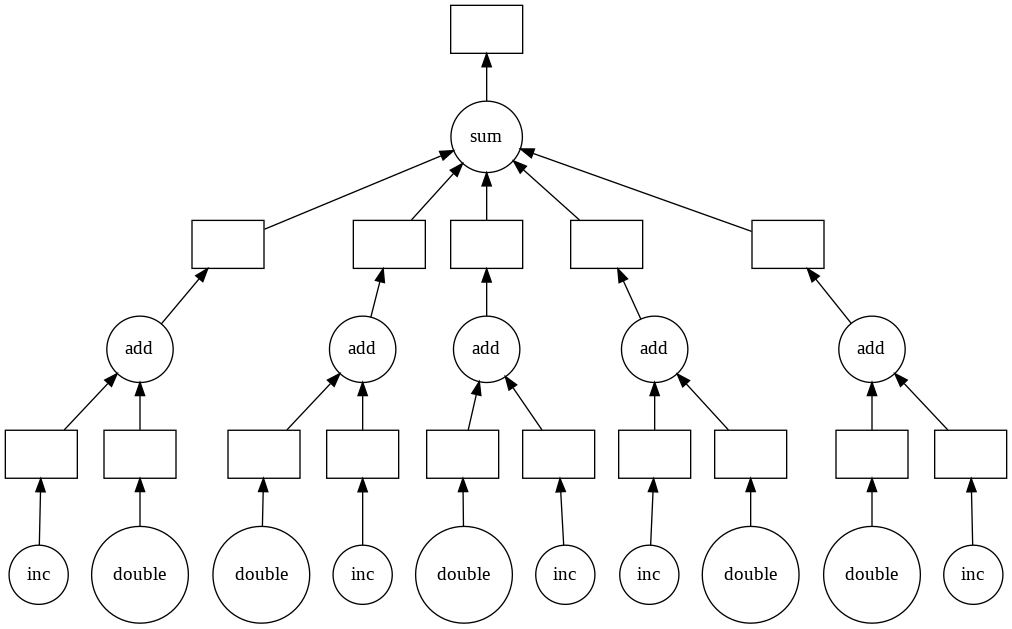

In [ ]:
import dask

output = []
for x in data:
    a = dask.delayed(inc)(x)
    b = dask.delayed(double)(x)
    c = dask.delayed(add)(a, b)
    output.append(c)

total = dask.delayed(sum)(output)

total.visualize()

In [ ]:
total.compute()

50

What if multiple computes?

In [ ]:
from dask import compute

compute(*[total, total])

(50, 50)

In [ ]:
!wget https://github.com/gumdropsteve/datasets/raw/master/iris.csv

In [ ]:
from dask import dataframe as dd

df = dd.read_csv('iris.csv')

In [ ]:
compute([df])

([     sepal_length  sepal_width  petal_length  petal_width    species  target
  0             5.1          3.5           1.4          0.2     setosa       0
  1             4.9          3.0           1.4          0.2     setosa       0
  2             4.7          3.2           1.3          0.2     setosa       0
  3             4.6          3.1           1.5          0.2     setosa       0
  4             5.0          3.6           1.4          0.2     setosa       0
  ..            ...          ...           ...          ...        ...     ...
  145           6.7          3.0           5.2          2.3  virginica       2
  146           6.3          2.5           5.0          1.9  virginica       2
  147           6.5          3.0           5.2          2.0  virginica       2
  148           6.2          3.4           5.4          2.3  virginica       2
  149           5.9          3.0           5.1          1.8  virginica       2
  
  [150 rows x 6 columns]],)

In [ ]:
compute(*[total, total, df])

(50,
 50,
      sepal_length  sepal_width  petal_length  petal_width    species  target
 0             5.1          3.5           1.4          0.2     setosa       0
 1             4.9          3.0           1.4          0.2     setosa       0
 2             4.7          3.2           1.3          0.2     setosa       0
 3             4.6          3.1           1.5          0.2     setosa       0
 4             5.0          3.6           1.4          0.2     setosa       0
 ..            ...          ...           ...          ...        ...     ...
 145           6.7          3.0           5.2          2.3  virginica       2
 146           6.3          2.5           5.0          1.9  virginica       2
 147           6.5          3.0           5.2          2.0  virginica       2
 148           6.2          3.4           5.4          2.3  virginica       2
 149           5.9          3.0           5.1          1.8  virginica       2
 
 [150 rows x 6 columns])

In [ ]:
compute(*[total, df, total])

(50,
      sepal_length  sepal_width  petal_length  petal_width    species  target
 0             5.1          3.5           1.4          0.2     setosa       0
 1             4.9          3.0           1.4          0.2     setosa       0
 2             4.7          3.2           1.3          0.2     setosa       0
 3             4.6          3.1           1.5          0.2     setosa       0
 4             5.0          3.6           1.4          0.2     setosa       0
 ..            ...          ...           ...          ...        ...     ...
 145           6.7          3.0           5.2          2.3  virginica       2
 146           6.3          2.5           5.0          1.9  virginica       2
 147           6.5          3.0           5.2          2.0  virginica       2
 148           6.2          3.4           5.4          2.3  virginica       2
 149           5.9          3.0           5.1          1.8  virginica       2
 
 [150 rows x 6 columns],
 50)

[IRL example using Delayed](https://gist.github.com/gumdropsteve/284bc99ee5d21026e80450b3b35a494e)